In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns

In [2]:
df= pd.read_csv("my_movies.csv")

In [3]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [11]:
df1=df.iloc[ : , 5: ]
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


# using 5 % support and 60 % threshold & Mertic as "Lift"

In [14]:
freq_item1= apriori(df=df1, min_support= 0.05 , use_colnames= True)
freq_item1.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [15]:
freq_item1.shape

(53, 2)

In [16]:
rule1= association_rules(df=freq_item1, metric="lift", min_threshold=0.6)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(LOTR2, Sixth Sense, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(LOTR2),"(LOTR1, Sixth Sense, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(LOTR1, Green Mile, Harry Potter1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(LOTR1, Sixth Sense, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [17]:
rule1.sort_values("lift", ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
212,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
106,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,"(LOTR2, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
210,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
136,"(Green Mile, Gladiator, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
9,(Sixth Sense),(LOTR2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960000
21,(Gladiator),(Green Mile),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
56,(Gladiator),"(Green Mile, Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
53,"(Green Mile, Sixth Sense)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000


In [19]:
rule1[(rule1["lift"]>6) & (rule1["confidence"]> 0.9)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
106,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
111,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
136,"(Green Mile, Gladiator, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
140,"(Green Mile, Gladiator)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf
145,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
149,(LOTR),"(Green Mile, Gladiator, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
154,"(LOTR1, Sixth Sense)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
155,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
158,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
159,"(LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [20]:
rule1[(rule1["lift"]>6) & (rule1["confidence"]> 0.9)].shape

(42, 9)

array([[<AxesSubplot:title={'center':'lift'}>,
        <AxesSubplot:title={'center':'support'}>],
       [<AxesSubplot:title={'center':'confidence'}>, <AxesSubplot:>]],
      dtype=object)

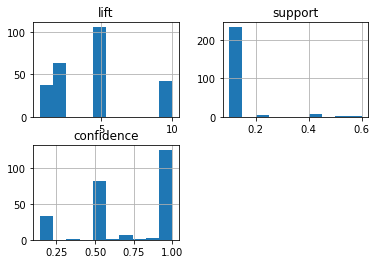

In [21]:
rule1[["lift", "support" , "confidence"]].hist()

<AxesSubplot:xlabel='support', ylabel='confidence'>

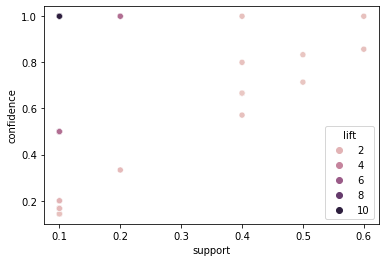

In [23]:
sns.scatterplot(data=rule1, x="support", y="confidence", hue= "lift")

# Using 10 % support and 70% threshold & metric as "Lift

In [37]:
freq_item2 = apriori(df=df1, min_support= 0.1, use_colnames= True)
freq_item2.shape

(53, 2)

In [38]:
rule2= association_rules(df=freq_item2, metric= "lift", min_threshold=0.7)
rule2.sort_values("lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
212,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
106,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,"(LOTR2, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
210,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
136,"(Green Mile, Gladiator, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
9,(Sixth Sense),(LOTR2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960000
21,(Gladiator),(Green Mile),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
56,(Gladiator),"(Green Mile, Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
53,"(Green Mile, Sixth Sense)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000


<AxesSubplot:xlabel='support', ylabel='confidence'>

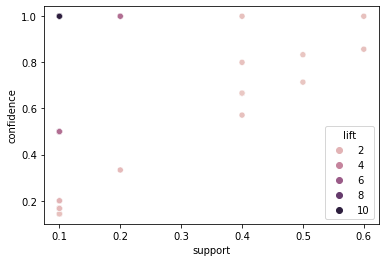

In [39]:
sns.scatterplot(data=rule2, x="support", y="confidence", hue= "lift")

array([[<AxesSubplot:title={'center':'lift'}>,
        <AxesSubplot:title={'center':'support'}>],
       [<AxesSubplot:title={'center':'confidence'}>, <AxesSubplot:>]],
      dtype=object)

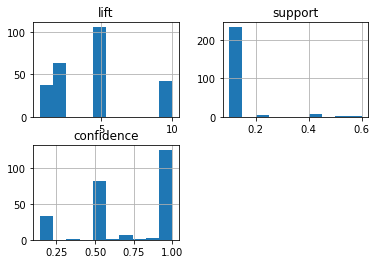

In [44]:
rule2[["lift", "support" , "confidence"]].hist()

# using 5 % support and 60 % threshold and metric as "Confidence"

In [46]:
freq_item3= apriori(df=df1, min_support=0.05, use_colnames=True)
freq_item3.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [47]:
freq_item3.shape

(53, 2)

In [48]:
rule3= association_rules(df=freq_item3, metric="confidence", min_threshold=0.6)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(LOTR2, Sixth Sense)","(LOTR1, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(LOTR2, Harry Potter1)","(LOTR1, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(LOTR2, Green Mile)","(LOTR1, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Sixth Sense, Harry Potter1)","(LOTR1, Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [49]:
rule3.sort_values("lift", ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
133,"(Green Mile, Harry Potter1)","(LOTR1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
109,"(LOTR2, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
106,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
99,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
98,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
15,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
19,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [52]:
rule3[(rule3["lift"]>6) & (rule3["confidence"]> 0.9)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
47,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
58,"(Green Mile, Gladiator, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
62,"(Green Mile, Gladiator)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf
65,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
66,(LOTR),"(Green Mile, Gladiator, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
71,"(LOTR1, Sixth Sense)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
72,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
74,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
75,"(LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


array([[<AxesSubplot:title={'center':'lift'}>,
        <AxesSubplot:title={'center':'support'}>],
       [<AxesSubplot:title={'center':'confidence'}>, <AxesSubplot:>]],
      dtype=object)

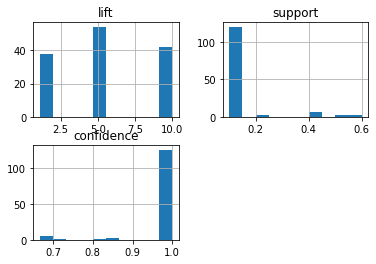

In [53]:
rule3[["lift", "support" , "confidence"]].hist()